# Cars Dataset


The dataset contains several models and makes of cars as a CSV file [`cars.csv`]. Each car type is represented by a single row in the dataset with the following columns:
- column 0: number of cylinders (integer number)
- column 1: engine displacement (number, measured in $inch^2$)
- column 2: engine power (number, measured in $hp$)
- column 3: gross weight (number, measured in $lbs$)
- column 4: acceleration (floating point number, number of seconds to reach 60 $mph$)
- column 5: gas milage (number, measured in $MPG$)

## Imports

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Load dataset

Load the `cars.csv` file into a single NumPy array. 

In [8]:
CYLINDER = 0
DISPLACEMENT = 1
HORSEPOWER = 2
WEIGHT = 3
ACCEL = 4
MPG = 5

cars = np.loadtxt('cars.csv', delimiter=',', skiprows=1)
cars.shape

(392, 6)

## Scatter plots

Create four scatter plots to visualize correlations.

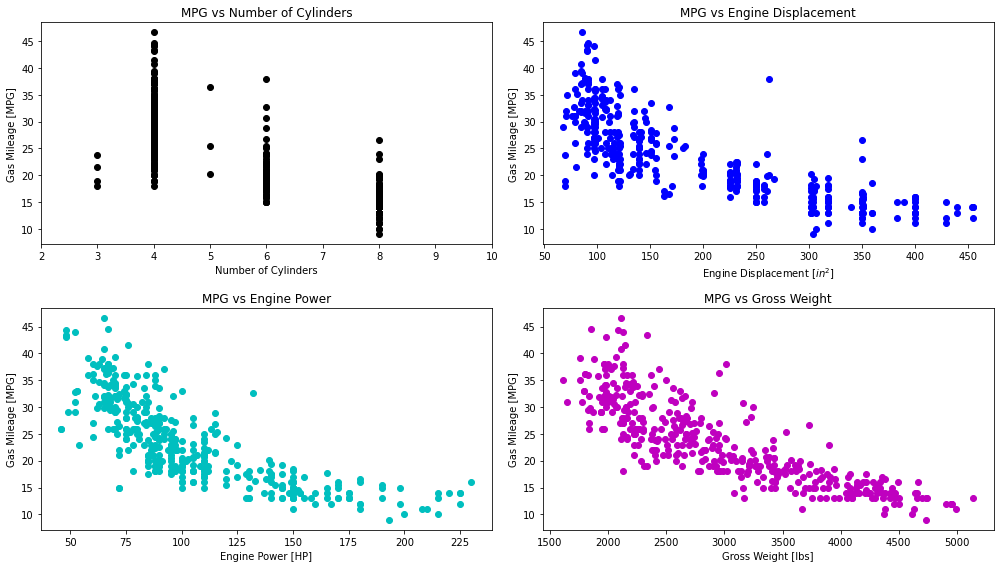

In [9]:
plt.figure(figsize=(14, 8))
plt.subplot(2,2,1)
plt.plot(cars[:, CYLINDER], cars[:, MPG], 'ko')
plt.xlim(2, 10)
plt.title('MPG vs Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Gas Mileage [MPG]')

plt.subplot(2,2,2)
plt.plot(cars[:, DISPLACEMENT], cars[:, MPG], 'bo')
plt.title('MPG vs Engine Displacement')
plt.xlabel('Engine Displacement [$in^2$]')
plt.ylabel('Gas Mileage [MPG]')

plt.subplot(2,2,3)
plt.plot(cars[:, HORSEPOWER], cars[:, MPG], 'co')
plt.title('MPG vs Engine Power')
plt.xlabel('Engine Power [HP]')
plt.ylabel('Gas Mileage [MPG]')

plt.subplot(2,2,4)
plt.plot(cars[:, WEIGHT], cars[:, MPG], 'mo')
plt.title('MPG vs Gross Weight')
plt.xlabel('Gross Weight [lbs]')
plt.ylabel('Gas Mileage [MPG]')

plt.tight_layout()

## Linear regression with one variable

Add estimated linear model to plots.

Text(0, 0.5, 'Gas Mileage [MPG]')

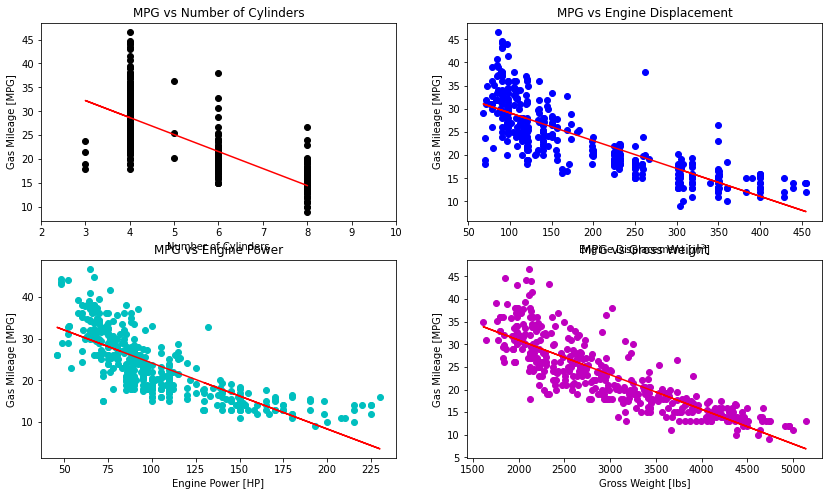

In [5]:
plt.figure(figsize=(14, 8))
plt.subplot(2,2,1)
plt.plot(cars[:, CYLINDER], cars[:, MPG], 'ko')
x = cars[:, CYLINDER]
m, c = np.linalg.lstsq(np.stack([x, np.ones(len(x))], axis=-1), cars[:, MPG], rcond=None)[0]
plt.plot(x, m * x + c, 'r-')
plt.xlim(2, 10)
plt.title('MPG vs Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Gas Mileage [MPG]')

plt.subplot(2,2,2)
plt.plot(cars[:, DISPLACEMENT], cars[:, MPG], 'bo')
x = cars[:, DISPLACEMENT]
m, c = np.linalg.lstsq(np.stack([x, np.ones(len(x))], axis=-1), cars[:, MPG], rcond=None)[0]
plt.plot(x, m * x + c, 'r-')
plt.title('MPG vs Engine Displacement')
plt.xlabel('Engine Displacement [$in^2$]')
plt.ylabel('Gas Mileage [MPG]')

plt.subplot(2,2,3)
plt.plot(cars[:, HORSEPOWER], cars[:, MPG], 'co')
x = cars[:, HORSEPOWER]
m, c = np.linalg.lstsq(np.stack([x, np.ones(len(x))], axis=-1), cars[:, MPG], rcond=None)[0]
plt.plot(x, m * x + c, 'r-')
plt.title('MPG vs Engine Power')
plt.xlabel('Engine Power [HP]')
plt.ylabel('Gas Mileage [MPG]')

plt.subplot(2,2,4)
plt.plot(cars[:, WEIGHT], cars[:, MPG], 'mo')
x = cars[:, WEIGHT]
m, c = np.linalg.lstsq(np.stack([x, np.ones(len(x))], axis=-1), cars[:, MPG], rcond=None)[0]
plt.plot(x, m * x + c, 'r-')
plt.title('MPG vs Gross Weight')
plt.xlabel('Gross Weight [lbs]')
plt.ylabel('Gas Mileage [MPG]')

## Linear regression with multiple variables

Create a multi-variate regression model, where all five parameters (number of cylinders, engine displacement,  engine power, gross weight and acceleration) are the independent variables (`x`) and the MPG value is the dependent variable (`y`).

Based on the linear regression model, estimate the expected MPG parameter of an unknown car with the following parameters:

- number of cylinders = 6
- engine displacement = 266
- engine power = 178
- gross weight = 4112
- acceleration = 14.4


In [6]:
n_cars = cars.shape[0]
x = cars[:, :5]
y = cars[:, 5]
p = np.linalg.lstsq(np.concatenate([x, np.ones((n_cars, 1))], axis=1), cars[:, MPG], rcond=None)[0]
p.dot(np.array([6.0, 266, 178, 4112, 14.4, 1.0]))

14.051152803988673